In [136]:
pip install konlpy

In [137]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt-get install -y fonts-nanum*

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# NLTK 리소스 다운로드
nltk.download('stopwords')
nltk.download('wordnet')

# 자연어 처리를 해보고자 함

!apt-get update -qq
!apt-get install -y fonts-nanum
!fc-cache -fv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 54 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 54 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped dire

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import missingno as msno
import os
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
import re
from functools import reduce
from collections import defaultdict
import matplotlib as mpl
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False
%config InlineBackend.figure_format = 'retina'
import pandas as pd
from collections import Counter
import re
from konlpy.tag import Okt

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 54 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [139]:
from google.colab import drive
# 구글 드라이브 마운트
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/baf/검색어 MZ취업 크롤링.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/baf/검색어 취업시장 크롤링.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/baf/검색어 취업준비 크롤링.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/baf/검색어 취준 크롤링.csv')

In [141]:
df1.columns

Index(['date', 'title', 'link', 'content'], dtype='object')

In [142]:
df2.columns

Index(['date', 'title', 'link', 'content'], dtype='object')

In [143]:
df3.columns

Index(['date', 'title', 'link', 'content'], dtype='object')

In [144]:
df4.columns

Index(['date', 'title', 'link', 'content'], dtype='object')

In [145]:
merged_df = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)
print(merged_df)

                     date                                              title  \
0     2024-09-29 18:20:14  “10월의 기적” 베트남 MZ들은 어떻게 얼어붙은 농가에 생기를 불어넣을까?.. “...   
1     2024-09-23 17:26:13     퍼스널 컬러·MBTI·골격 진단까지… 좁아진 취업 문에 ‘셀프 컨설팅’ 받는 MZ들   
2     2024-09-23 13:15:06                            MZ세대 청년을 위한 공감·소통 토크콘서트   
3     2024-09-22 11:15:04                   '취업의 신'·장혁·빽가의 스토리…'서울시민 쏘울 자랑회'   
4     2024-09-23 12:20:50                          개그맨 이승윤 강원 태백서 MZ세대 대상 강연   
...                   ...                                                ...   
1303  2021-06-22 16:03:48                   [e글중심] “25세 대학생, 청와대 청년비서관 됐다고?”   
1304  2021-06-15 10:53:03                   취준생 59.8% 취업 준비하는 척…'나는 쇼윈도 취준생'   
1305  2021-06-09 09:29:01                    영화 ‘메이드 인 루프탑’, 밝고 유쾌한 청춘퀴어물 탄생   
1306  2021-05-23 09:54:01                "월급통장인 줄 알았더니 대포통장"…취준생 두번 울리는 채용사기   
1307  2021-05-11 20:09:01  [영상] 평범한 대학생이 영상 콘텐츠 제작 PD에서 3만 클럽하우스 인플루언서가 되기까지   

                                       

In [146]:
duplicated_titles = merged_df[merged_df.duplicated(subset=['title'], keep=False)]

print("중복된 title 값:")
print(duplicated_titles[['link', 'title']])  # 'link'와 'title'만 출력하여 중복 확인

중복된 title 값:
                                                   link  \
1     https://n.news.naver.com/mnews/article/081/000...   
15    https://n.news.naver.com/mnews/article/421/000...   
236   https://n.news.naver.com/mnews/article/629/000...   
296   https://n.news.naver.com/mnews/article/009/000...   
315   https://n.news.naver.com/mnews/article/014/000...   
...                                                 ...   
903   https://n.news.naver.com/mnews/article/079/000...   
914   https://n.news.naver.com/mnews/article/009/000...   
1077  https://n.news.naver.com/mnews/article/030/000...   
1151  https://n.news.naver.com/mnews/article/629/000...   
1274  https://n.news.naver.com/mnews/article/009/000...   

                                                  title  
1        퍼스널 컬러·MBTI·골격 진단까지… 좁아진 취업 문에 ‘셀프 컨설팅’ 받는 MZ들  
15            '홍보영상 1000만뷰' 찍자 벌어진 일…HD현대 공채 지원 70% '쑥'  
236            [MZ취준생의 비명①] 인터넷수강료만 수백만원…등록금 맞먹는 취업준비비용  
296   대기업 공채 끊긴지 오래…'취업왕'이 찍어준 취뽀 필승전략 [황순민 기자

In [147]:
len(merged_df)

1308

In [148]:
merged_df_unique = merged_df.drop_duplicates(subset=['title'], keep='first')
print(merged_df_unique)


                     date                                              title  \
0     2024-09-29 18:20:14  “10월의 기적” 베트남 MZ들은 어떻게 얼어붙은 농가에 생기를 불어넣을까?.. “...   
1     2024-09-23 17:26:13     퍼스널 컬러·MBTI·골격 진단까지… 좁아진 취업 문에 ‘셀프 컨설팅’ 받는 MZ들   
2     2024-09-23 13:15:06                            MZ세대 청년을 위한 공감·소통 토크콘서트   
3     2024-09-22 11:15:04                   '취업의 신'·장혁·빽가의 스토리…'서울시민 쏘울 자랑회'   
4     2024-09-23 12:20:50                          개그맨 이승윤 강원 태백서 MZ세대 대상 강연   
...                   ...                                                ...   
1303  2021-06-22 16:03:48                   [e글중심] “25세 대학생, 청와대 청년비서관 됐다고?”   
1304  2021-06-15 10:53:03                   취준생 59.8% 취업 준비하는 척…'나는 쇼윈도 취준생'   
1305  2021-06-09 09:29:01                    영화 ‘메이드 인 루프탑’, 밝고 유쾌한 청춘퀴어물 탄생   
1306  2021-05-23 09:54:01                "월급통장인 줄 알았더니 대포통장"…취준생 두번 울리는 채용사기   
1307  2021-05-11 20:09:01  [영상] 평범한 대학생이 영상 콘텐츠 제작 PD에서 3만 클럽하우스 인플루언서가 되기까지   

                                       

In [149]:
df = merged_df_unique.copy()

In [150]:
df['date'] = pd.to_datetime(df['date'])

min_date = df['date'].min()
max_date = df['date'].max()

print(f"최소 날짜: {min_date}")
print(f"최대 날짜: {max_date}")

최소 날짜: 2008-01-21 08:30:09
최대 날짜: 2024-09-30 11:00:08


In [151]:
df['date'] = pd.to_datetime(df['date'])

df_2019_onwards = df[df['date'] >= '2019-01-01']
len(df_2019_onwards)

1171

In [152]:
df = df_2019_onwards.copy()

In [153]:
df.head()

,date,title,link,content
0,2024-09-29 18:20:14,“10월의 기적” 베트남 MZ들은 어떻게 얼어붙은 농가에 생기를 불어넣을까?.. “...,https://n.news.naver.com/mnews/article/661/000...,[\n외국인 계절근로자 프로그램 확대 운영위미 40명→고산·대정 등 110명 늘어농...
1,2024-09-23 17:26:13,퍼스널 컬러·MBTI·골격 진단까지… 좁아진 취업 문에 ‘셀프 컨설팅’ 받는 MZ들,https://n.news.naver.com/mnews/article/081/000...,[\n2030세대 사이 ‘퍼스널 컨설팅’ 인기체형·성격 유형 종합진단 50만원 훌쩍...
2,2024-09-23 13:15:06,MZ세대 청년을 위한 공감·소통 토크콘서트,https://n.news.naver.com/mnews/article/087/000...,[\n오는 25일 태백 문화예술회관 소공연장 개그맨 이승윤 강연\n\n\n\n【태백...
3,2024-09-22 11:15:04,'취업의 신'·장혁·빽가의 스토리…'서울시민 쏘울 자랑회',https://n.news.naver.com/mnews/article/001/001...,"[\n서울런 멘토·교수 등 시민연사 콘서트…""꿈과 도전의 시간"" \n\n\n\n'서..."
4,2024-09-23 12:20:50,개그맨 이승윤 강원 태백서 MZ세대 대상 강연,https://n.news.naver.com/mnews/article/421/000...,[\n오는 25일 태백시문화예술회관 소공연장\n\n\n\n강원 태백시가 오는 25일...


##### 자연어 처리

In [154]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer

키워드 및 중요도:
취업      80.012453
청년      76.172151
기업      49.469375
채용      41.170450
준비      35.668410
세대      34.977658
일자리     32.336766
지원      29.492258
구직      29.173644
고용      27.352518
면접      26.333080
증가      23.906373
응답      21.912854
학생      20.709286
제공      20.667287
대학      20.524745
프로그램    20.367458
서울      19.845065
진행      19.282395
인구      18.603167
dtype: float64


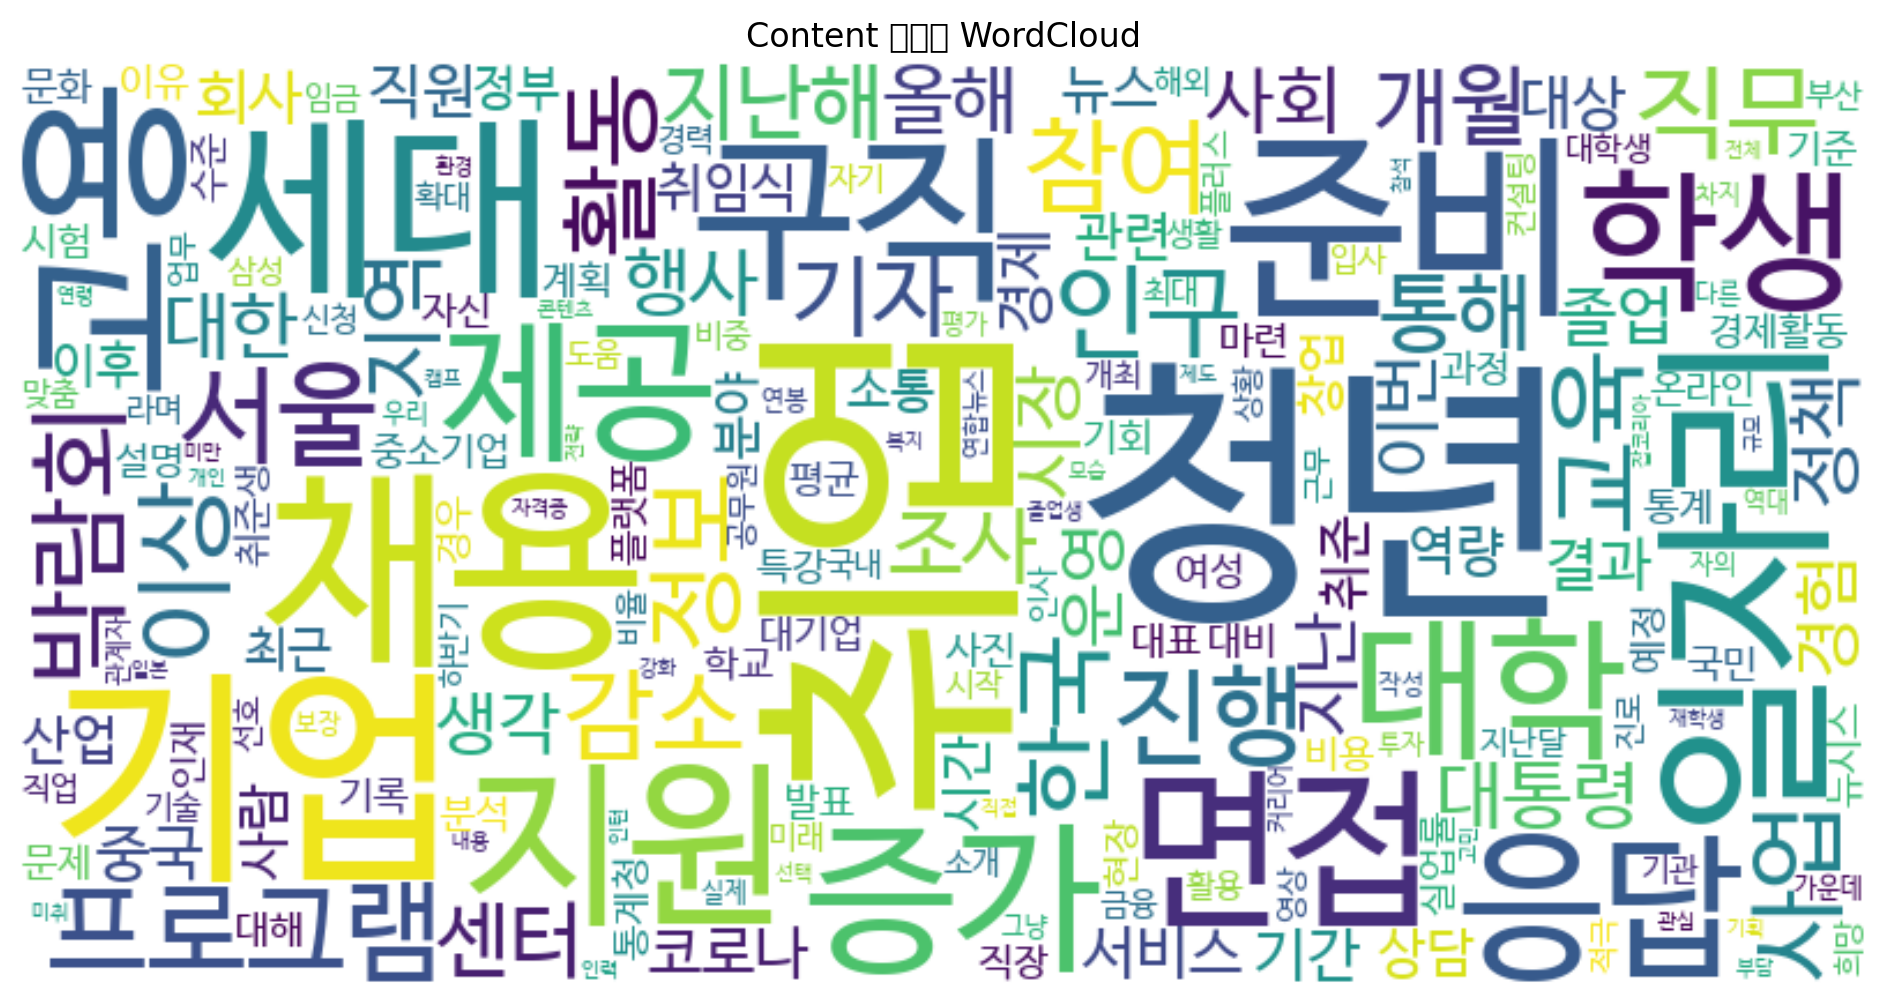

In [155]:
# 필요한 라이브러리 import
from konlpy.tag import Okt  # KoNLPy의 Okt 클래스
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# KoNLPy의 Okt 클래스 사용
okt = Okt()

# 한국어 불용어 목록 (예시)
stop_words = set([
    '의', '가', '이', '은', '는', '를', '에', '과', '와', '의', '들', '한', '하다', '도', '로', '으로',
    '에서', '까지', '그', '저', '이', '가', '와', '인', '나', '너', '저', '지', '다', '그', '어', '를', '이라서',
    '인해', '있는', '하고', '했다', '이다', '한다', '가장', '있다', '하는', '있었다', '입니다', '하지만',
    '있어', '때문', '위해', 'gt', 'com'
])

# 예제 텍스트 (NameError 문제 해결을 위한 정의)
text = "이것은 텍스트 전처리를 위한 예제 문장입니다. KoNLPy의 Okt를 사용하여 형태소를 분석합니다."

# 텍스트 전처리 함수 정의
def preprocess_text(text):
    # 형태소 분석
    tokens = okt.nouns(text)  # 명사만 추출 (명사 이외의 형태소를 사용하려면 okt.morphs 사용)
    # 불용어 제거
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# 데이터프레임의 'content' 열을 전처리
df['content_1'] = df['content'].apply(preprocess_text)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['content_1'])

# 키워드와 중요도 추출
feature_names = vectorizer.get_feature_names_out()
dense = X.todense()
dfdf = pd.DataFrame(dense, columns=feature_names)

# 각 단어의 총 TF-IDF 점수
tfidf_scores = dfdf.sum().sort_values(ascending=False)

# 결과 출력
print("키워드 및 중요도:")
print(tfidf_scores.head(20))  # 상위 20개 키워드 출력

# WordCloud를 위한 한글 폰트 설정 (NanumBarunGothic 폰트 사용)
# 사용할 폰트 경로 지정 (시스템에 따라 폰트 경로 수정)
font_path = None

# 시스템 폰트 경로에서 'NanumBarunGothic' 폰트 검색
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'NanumBarunGothic' in font:  # 'NanumBarunGothic' 폰트가 있는지 확인
        font_path = font
        break

# WordCloud 생성
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(tfidf_scores)

# 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Content 키워드 WordCloud')
plt.show()
